In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns

In [2]:
suicide= pd.read_csv(r"C:\Users\100019201\OneDrive\Documentos\2do SEMESTRE\Ciencia de datos\Tarea 1\suicide_data.csv")

In [3]:
type(suicide)

pandas.core.frame.DataFrame

In [4]:
suicide.isnull()
#Se va a contar los valores nulos por cada variable 
suicide.isna().sum()

#Se observa que hay missings en HDI

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [5]:
suicide.interpolate(method='linear')

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,2.156625e+09,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,2.156625e+09,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,2.156625e+09,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,2.156625e+09,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,2.156625e+09,796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,6.306708e+10,2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,6.306708e+10,2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,6.306708e+10,2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,6.306708e+10,2309,Generation Z


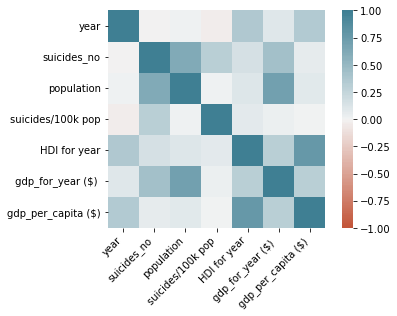

In [6]:
corr = suicide.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

#Colores más azules que no sean en la diagonal es que su correlación es mayor, los valores son positivos.

In [7]:
suicidios_agregados= suicide.groupby('country').agg({'suicides_no':['sum'],' gdp_for_year ($) ': ['mean']})
print (suicidios_agregados)

                     suicides_no  gdp_for_year ($) 
                             sum               mean
country                                            
Albania                     1970       5.211661e+09
Antigua and Barbuda           11       8.035452e+08
Argentina                  82219       2.742565e+11
Armenia                     1905       5.386592e+09
Aruba                        101       2.196223e+09
...                          ...                ...
United Arab Emirates         622       2.532432e+11
United Kingdom            136805       1.816067e+12
United States            1034013       1.051071e+13
Uruguay                    13138       2.337827e+10
Uzbekistan                 34803       2.286003e+10

[101 rows x 2 columns]


In [8]:
suicidios_agregados.keys()

MultiIndex([(       'suicides_no',  'sum'),
            (' gdp_for_year ($) ', 'mean')],
           )

<AxesSubplot:xlabel="('suicides_no', 'sum')", ylabel="(' gdp_for_year ($) ', 'mean')">

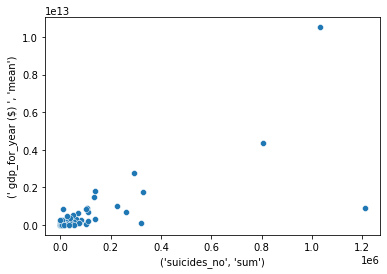

In [9]:
sns.scatterplot(x=('suicides_no','sum'), y=(' gdp_for_year ($) ','mean'), data=suicidios_agregados)


<AxesSubplot:xlabel="('suicides_no', 'sum')", ylabel="(' gdp_for_year ($) ', 'mean')">

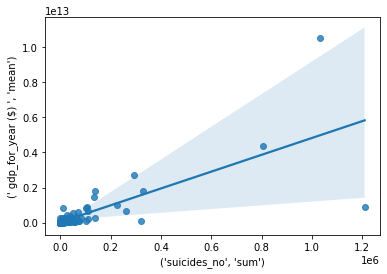

In [10]:
media_pib=suicidios_agregados.loc[:,(' gdp_for_year ($) ','mean')]
suma_suic=suicidios_agregados.loc[:,('suicides_no','sum')]
sns.regplot(x=suma_suic, y=media_pib)

In [11]:
suicidios_agregados2= suicide.groupby(['country','year']).agg({'suicides_no':['sum'],'population': ['sum']})
print (suicidios_agregados2)

                suicides_no population
                        sum        sum
country    year                       
Albania    1987          73    2709600
           1988          63    2764300
           1989          68    2803100
           1992          47    2822500
           1993          73    2807300
...                     ...        ...
Uzbekistan 2010        1464   25651783
           2011        1640   25978049
           2012        1835   26381830
           2013        1950   26838924
           2014        2095   27313507

[2321 rows x 2 columns]


<AxesSubplot:xlabel="('suicides_no', 'sum')", ylabel="('population', 'sum')">

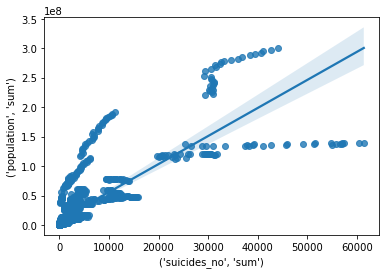

In [12]:
suma_pob=suicidios_agregados2.loc[:,('population','sum')]
suma_suic=suicidios_agregados2.loc[:,('suicides_no','sum')]
sns.regplot(x=suma_suic, y=suma_pob)

In [13]:
suicidios_agregados3= suicidios_agregados2.groupby(['country']).agg({('suicides_no','sum'):['mean'],('population','sum'): ['mean']})
print (suicidios_agregados3)

                       suicides_no    population
                               sum           sum
                              mean          mean
country                                         
Albania                  89.545455  2.832976e+06
Antigua and Barbuda       0.407407  7.371215e+04
Argentina              2652.225806  3.341888e+07
Armenia                  76.200000  3.093927e+06
Aruba                     7.214286  8.997693e+04
...                            ...           ...
United Arab Emirates    103.666667  6.083712e+06
United Kingdom         4413.064516  5.608928e+07
United States         33355.258065  2.598073e+08
Uruguay                 469.214286  3.002462e+06
Uzbekistan             1581.954545  2.211012e+07

[101 rows x 2 columns]


<AxesSubplot:xlabel="('suicides_no', 'sum', 'mean')", ylabel="('population', 'sum', 'mean')">

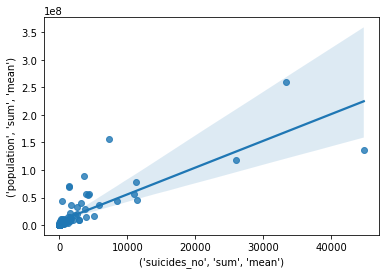

In [14]:
suma_pob=suicidios_agregados3.loc[:,('population','sum','mean')]
suma_suic=suicidios_agregados3.loc[:,('suicides_no','sum','mean')]
sns.regplot(x=suma_suic, y=suma_pob)

In [15]:
suicidios_agregados4= suicide.groupby(['country','sex']).agg({'suicides_no':['sum']})
print (suicidios_agregados4)

                           suicides_no
                                   sum
country             sex               
Albania             female         693
                    male          1277
Antigua and Barbuda female           1
                    male            10
Argentina           female       18326
...                                ...
United States       male        820216
Uruguay             female        2820
                    male         10318
Uzbekistan          female        9260
                    male         25543

[202 rows x 1 columns]


<AxesSubplot:xlabel="('suicides_no', 'sum')", ylabel='Density'>

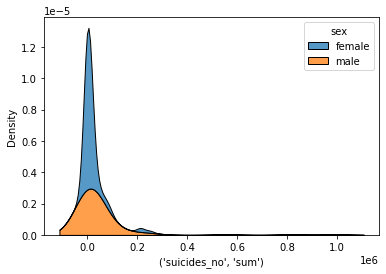

In [16]:
sns.kdeplot(data=suicidios_agregados4,x=('suicides_no','sum'),hue="sex",multiple="stack")

In [17]:
list1 = ["female","male"]
sex=[]
for i in range(0,int(suicidios_agregados4.shape[0]/2)):
   sex=sex+list1


<AxesSubplot:ylabel="('suicides_no', 'sum')">

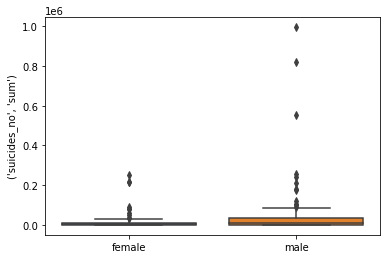

In [18]:
sns.boxplot(x=sex,y=suicidios_agregados4.loc[:,('suicides_no','sum')])

In [19]:
suicidios_agregados5=suicidios_agregados4.groupby("sex").agg({('suicides_no','sum'):['mean']})
suicidios_agregados5

,suicides_no
,sum
,mean
sex,
female,15440.693069
male,51375.346535


In [20]:
suicidios_agregados6= suicide.groupby(['country','age']).agg({'suicides_no':['sum']})
print (suicidios_agregados6)

                       suicides_no
                               sum
country    age                    
Albania    15-24 years         546
           25-34 years         427
           35-54 years         591
           5-14 years           61
           55-74 years         264
...                            ...
Uzbekistan 25-34 years        8578
           35-54 years       10964
           5-14 years         1376
           55-74 years        3595
           75+ years           617

[605 rows x 1 columns]


<AxesSubplot:xlabel="('suicides_no', 'sum')", ylabel='Density'>

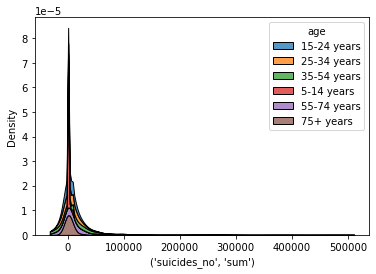

In [21]:
sns.kdeplot(data=suicidios_agregados6,x=('suicides_no','sum'),hue="age",multiple="stack")

In [22]:
suicidios_agregados7=suicidios_agregados6.groupby("age").agg({('suicides_no','sum'):['mean']})
suicidios_agregados7

,suicides_no
,sum
,mean
age,
15-24 years,8005.366337
25-34 years,11127.841584
35-54 years,24278.623762
5-14 years,522.640000
55-74 years,16420.227723
75+ years,6466.514851


In [23]:
suicidios_mexico_eua = suicide[(suicide['country'] == "Mexico") | (suicide['country'] == "United States")]
suicidios_mexico_eua

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
16564,Mexico,1985,male,75+ years,44,432000,10.19,Mexico1985,0.634,1.844726e+11,2730,G.I. Generation
16565,Mexico,1985,male,55-74 years,145,2330000,6.22,Mexico1985,0.634,1.844726e+11,2730,G.I. Generation
16566,Mexico,1985,male,25-34 years,340,5679000,5.99,Mexico1985,0.634,1.844726e+11,2730,Boomers
16567,Mexico,1985,male,35-54 years,327,5836000,5.60,Mexico1985,0.634,1.844726e+11,2730,Silent
16568,Mexico,1985,male,15-24 years,375,8420000,4.45,Mexico1985,0.634,1.844726e+11,2730,Generation X
...,...,...,...,...,...,...,...,...,...,...,...,...
27215,United States,2015,female,25-34 years,1444,21555712,6.70,United States2015,NaN,1.812071e+13,60387,Millenials
27216,United States,2015,female,15-24 years,1132,21633813,5.23,United States2015,NaN,1.812071e+13,60387,Millenials
27217,United States,2015,female,75+ years,540,11778666,4.58,United States2015,NaN,1.812071e+13,60387,Silent
27218,United States,2015,male,5-14 years,255,21273987,1.20,United States2015,NaN,1.812071e+13,60387,Generation Z


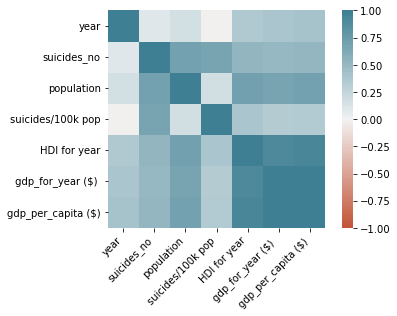

In [24]:
corr = suicidios_mexico_eua.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

#Estan más correlacionados al analizar solo dos países

In [25]:
suicidios_mex_eua= suicidios_mexico_eua.groupby(['country','year']).agg({'suicides_no':['sum'],' gdp_for_year ($) ': ['mean']})
print (suicidios_mex_eua)

                   suicides_no  gdp_for_year ($) 
                           sum               mean
country       year                               
Mexico        1985        1544       1.844726e+11
              1986        1714       1.294410e+11
              1987        1701       1.402634e+11
              1988        1703       1.831442e+11
              1989        1865       2.229770e+11
...                        ...                ...
United States 2011       39508       1.551793e+13
              2012       40596       1.615526e+13
              2013       41143       1.669152e+13
              2014       42769       1.742761e+13
              2015       44189       1.812071e+13

[62 rows x 2 columns]


<AxesSubplot:xlabel="('suicides_no', 'sum')", ylabel="(' gdp_for_year ($) ', 'mean')">

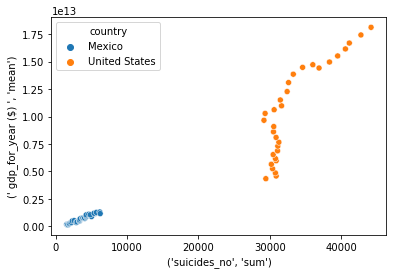

In [26]:
sns.scatterplot(x=('suicides_no','sum'), y=(' gdp_for_year ($) ','mean'),hue="country", data= suicidios_mex_eua)


In [27]:
suicidios_mex_eua1= suicidios_mexico_eua.groupby(['country','year']).agg({'suicides_no':['sum'],'population': ['sum']})
print (suicidios_mex_eua1)

                   suicides_no population
                           sum        sum
country       year                       
Mexico        1985        1544   67566000
              1986        1714   69123500
              1987        1701   67948100
              1988        1703   69646000
              1989        1865   71359000
...                        ...        ...
United States 2011       39508  290313825
              2012       40596  292827128
              2013       41143  295322862
              2014       42769  297749735
              2015       44189  300078511

[62 rows x 2 columns]


<AxesSubplot:xlabel="('suicides_no', 'sum')", ylabel="('population', 'sum')">

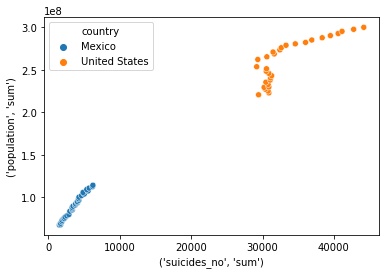

In [30]:
sns.scatterplot(x=('suicides_no','sum'), y=('population','sum'),hue="country", data= suicidios_mex_eua1)


In [31]:
suicidios_mex_eua2= suicidios_mexico_eua.groupby(['country','sex']).agg({'suicides_no':['sum']})
print (suicidios_mex_eua2)

                     suicides_no
                             sum
country       sex               
Mexico        female       19334
              male         91805
United States female      213797
              male        820216


<AxesSubplot:xlabel="('suicides_no', 'sum')", ylabel='Density'>

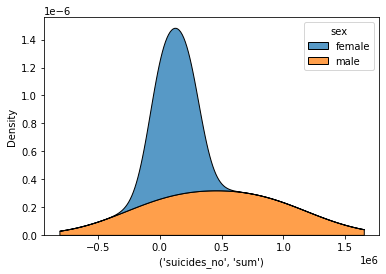

In [32]:
sns.kdeplot(data= suicidios_mex_eua2,x=('suicides_no','sum'),hue="sex",multiple="stack")

In [33]:
suicidios_mex_eua3= suicidios_mexico_eua.groupby(['country','age']).agg({'suicides_no':['sum']})
print (suicidios_mex_eua3)

                          suicides_no
                                  sum
country       age                    
Mexico        15-24 years       33664
              25-34 years       27226
              35-54 years       29997
              5-14 years         3930
              55-74 years       12318
              75+ years          4004
United States 15-24 years      141679
              25-34 years      182047
              35-54 years      380917
              5-14 years         8923
              55-74 years      224770
              75+ years         95677


<AxesSubplot:xlabel="('suicides_no', 'sum')", ylabel='Density'>

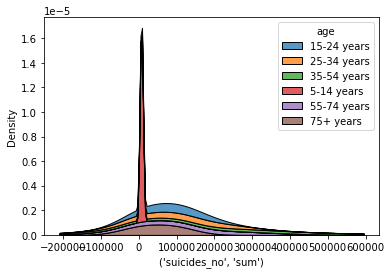

In [34]:
sns.kdeplot(data=suicidios_mex_eua3,x=('suicides_no','sum'),hue="age",multiple="stack")

In [38]:
suicidios_mex_eua4=suicidios_mex_eua3.groupby(["country","age"]).agg({('suicides_no','sum'):['mean']})
suicidios_mex_eua4

suicides_no
                                  sum
                                 mean
country       age                    
Mexico        15-24 years     33664.0
              25-34 years     27226.0
              35-54 years     29997.0
              5-14 years       3930.0
              55-74 years     12318.0
              75+ years        4004.0
United States 15-24 years    141679.0
              25-34 years    182047.0
              35-54 years    380917.0
              5-14 years       8923.0
              55-74 years    224770.0
              75+ years       95677.0